In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Overview

This star particle placement algorithm is ripped directly from TORCH's star formation method **`torch_sf.py`**. The method pulling mass from a sink particle and introducing it into the simulation space as a point star particle (AMUSE).

The algorithm detailed here has simplified inputs for ease of use and comprehension. Ultimately, stars are placed in a uniform distribution within the sink particle. At face value, this is certainly a logical way to proceed. Since a sink particle represents a volume of unstable collapsing gas within which star formation must be occuring **but** at a scale far to small to resolve. Therefore stars are then spawned uniformly at random positions within the sink particle region.

The issues with this method of star placement becomes more clear when we consider the restrictions placed on sink particles in FLASH and their dependencies with the level of max refinement. 

Consider a simulation in which a sink particle has already formed and has made some stars. Then you decide to restart the sim and increase the level of refinement by 1 level. This means that the stars-to-be-made inside the sink (as prescribed by the randomized star list) would then be placed within a region with 0.5x the radius, ~1/10th the volume. Of course this would alter the simulation, introducing stars in a much more confined form. 

Whether this effect produces clusters with unrealistic boundness I am unsure. It's true that there are other factors at play here, the stars' velocities are dependent on the velocity of the gas surrounding the sink particle, so a smaller sink may result in higher star velocities. 

When it comes to testing the effects of stellar feedback on the surrounding gas, a slightly more compact cluster should not have significant effects, since we really only care about getting the stars into the simulation. However, if the goal is to test the removal of gas and its effects on cluster dynamics, primordial binaries and their post-formation behavior, etc. it is assumed a varying compactness of the star forming region will have a more immediate effect.

Potential remedies for this include establishing a range in which stars are allowed to be placed that is constant in size no matter the size of the sink particle (and thereby the max refinement level). 

In [4]:
def random_three_vector(n=1):
    
    three_vector = np.zeros((n,3))
    
    phi = np.random.uniform(0,np.pi*2,n)
    costheta = np.random.uniform(-1,1,n)
    
    theta = np.arccos( costheta )
    three_vector[:,0] = np.sin( theta) * np.cos( phi )
    three_vector[:,1] = np.sin( theta) * np.sin( phi )
    three_vector[:,2] = np.cos( theta )
    return three_vector


In [5]:
sink_pos = (0,0,0)
sink_rad = 100.0
nnew = 1000

star_position = sink_pos + sink_rad * np.random.rand(nnew, 1)*random_three_vector(nnew)


In [6]:
xlist = []
ylist = []
zlist = []
maglist = []
for i,j in enumerate(star_position):
    xlist.append(star_position[i][0])
    ylist.append(star_position[i][1])
    zlist.append(star_position[i][2])
    mag = np.sqrt(star_position[i][0] ** 2 + star_position[i][1] ** 2 + star_position[i][2] ** 2)
    maglist.append(mag)
    

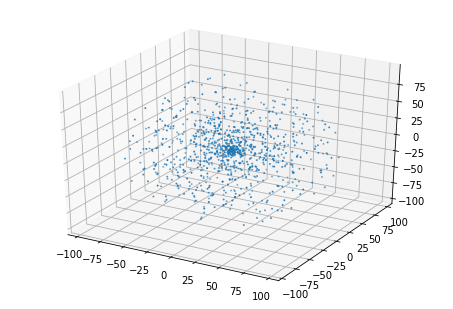

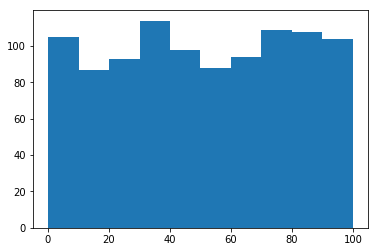

In [7]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xlist, ylist, zlist, s=1)
plt.show()

plt.figure()
plt.hist(maglist)
plt.show()
